<a href="https://colab.research.google.com/github/ajrianop/Models/blob/main/Neuronal_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
F=1.8*100+32
F

212.0

We want to compute Farenheit degrees according to the Celsius degree
$F=1.8 C +32,$

$C$: Celsius

$F$: Farenheit

We are going to compute for $100 C^{\circ},$

$F=1.8*100+32=212.0 F^{\circ}$

In [ ]:
Celsius=np.array([-40,-10,0, 8, 15, 22, 38], dtype=float)
Farenheit=np.array([-40,14,32,46,59,72,100], dtype=float)

In [ ]:
#Building the structure of the model, with one layer
capa=tf.keras.layers.Dense(units=1, input_shape=[1])
model= tf.keras.Sequential([capa])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error' #This function consider that a bit amount of big errors is worse than a big amount of tiny errors.
)

In [ ]:
print("Start the training")
historial=model.fit(Celsius,Farenheit, epochs=1000, verbose=False)
print("Model trained.")

Start the training
Model trained.


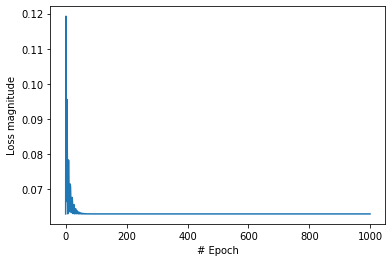

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoch")
plt.ylabel("Loss magnitude")
plt.plot(historial.history["loss"])

In [ ]:
print("Let do a prediction with this neuronal network")
celsius_data=float(input("Write the Celsius degree: "))
result= model.predict([celsius_data])
print(f"The result of {celsius_data} Celsius degrees is {result[0][0]} Farenheit degrees")

Let do a prediction with this neuronal network
Write the Celsius degree: 100
The result of 100.0 Celsius degrees is 211.74746704101562 Farenheit degrees


In [ ]:
#How is the inner structure of the net:
print("Inner variables")
print(capa.get_weights())

Inner variables
[array([[1.7979493]], dtype=float32), array([31.952526], dtype=float32)]


*Now we are going to consider the model with three neurons and two intermediate layers*

In [ ]:
hiden1=tf.keras.layers.Dense(units=3, input_shape=[1])
hiden2=tf.keras.layers.Dense(units=3)
target=tf.keras.layers.Dense(units=1)
model2=tf.keras.Sequential([hiden1,hiden2,target])

In [ ]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error' #This function consider that a bit amount of big errors is worse than a big amount of tiny errors.
)

In [ ]:
print("Start the training")
historial=model2.fit(Celsius,Farenheit, epochs=1000, verbose=False)
print("Model trained.")

Start the training
Model trained.


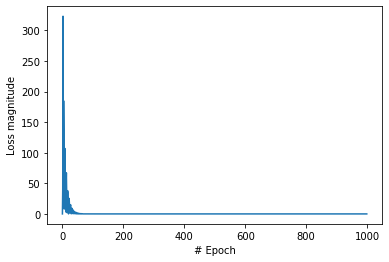

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoch")
plt.ylabel("Loss magnitude")
plt.plot(historial.history["loss"])

In [ ]:
print("Let do a prediction with this neuronal network")
celsius_data=float(input("Write the Celsius degree: "))
result= model2.predict([celsius_data])
print(f"The result of {celsius_data} Celsius degrees is {result[0][0]} Farenheit degrees")

Let do a prediction with this neuronal network
Write the Celsius degree: 100
The result of 100.0 Celsius degrees is 211.7474365234375 Farenheit degrees


In [ ]:
print("Inner variables of the model")
print(hiden1.get_weights())
print(hiden2.get_weights())
print(target.get_weights())

Inner variables of the model
[array([[-0.24861658,  0.5579086 , -0.033981  ]], dtype=float32), array([-3.3717093,  2.880939 ,  1.7713649], dtype=float32)]
[array([[ 0.67045695,  1.7272859 ,  0.97713184],
       [-0.42432573, -0.13183106, -0.4926098 ],
       [-0.00302589, -0.44142595,  0.447152  ]], dtype=float32), array([-3.0632107, -2.7794006, -2.9664774], dtype=float32)]
[array([[-1.3659679],
       [-1.2646396],
       [-1.1819112]], dtype=float32), array([2.5127587], dtype=float32)]


We can note that the values of the first and second model, are trained well enought and gives us values that are near to the solution:

model => 211.74746704101562

model2 =>211.7474365234375